<a href="https://colab.research.google.com/github/ussvarma/time_series_analysis/blob/main/LSTM_AND_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv("GOOG.csv",parse_dates=["Date"],index_col=[0])
df=df.iloc[:,:-1]
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086
...,...,...,...,...,...
2022-05-23,2202.080078,2240.110107,2183.084961,2233.330078,2233.330078
2022-05-24,2127.550049,2127.899902,2044.160034,2118.520020,2118.520020
2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-05-23,2202.080078,2240.110107,2183.084961,2233.330078,2233.330078
2022-05-24,2127.550049,2127.899902,2044.160034,2118.520020,2118.520020
2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039
2022-05-26,2121.010010,2179.104980,2109.760010,2165.919922,2165.919922
2022-05-27,2195.770020,2257.360107,2191.000000,2255.979980,2255.979980


In [ ]:
df.shape

(4476, 5)

In [ ]:
test_split=round(len(df)*0.20)
print(test_split)


895


In [ ]:
df_for_training=df[:-895]
df_for_testing=df[-895:]
print(df_for_training.shape)
print(df_for_testing.shape)

(3581, 5)
(895, 5)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        1.34908021e-04],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        3.39307537e-03],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        3.83867225e-03],
       ...,
       [8.38513750e-01, 8.43922922e-01, 8.38156069e-01, 8.27215513e-01,
        8.27215513e-01],
       [8.23181293e-01, 8.23889563e-01, 8.10375965e-01, 8.12689536e-01,
        8.12689536e-01],
       [8.10476525e-01, 8.28692499e-01, 8.24386693e-01, 8.25590596e-01,
        8.25590596e-01]])

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_for_training_scaled,60)
testX,testY=createXY(df_for_testing_scaled,60)

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (3521, 60, 5)
trainY Shape--  (3521,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[3.30298164e-04 9.44785459e-04 0.00000000e+00 1.34908021e-04
  1.34908021e-04]
 [7.42148227e-04 2.98909923e-03 1.88269054e-03 3.39307537e-03
  3.39307537e-03]
 [4.71386886e-03 4.78092896e-03 5.42828241e-03 3.83867225e-03
  3.83867225e-03]
 [4.91367646e-03 4.01532941e-03 3.15578542e-03 1.98679178e-03
  1.98679178e-03]
 [2.35285614e-03 2.54928676e-03 3.28434064e-03 2.44873974e-03
  2.44873974e-03]
 [2.34877785e-03 2.52892558e-03 3.60779701e-03 3.22955376e-03
  3.22955376e-03]
 [3.63326671e-03 2.80177162e-03 4.03492722e-03 2.51005881e-03
  2.51005881e-03]
 [2.48334262e-03 1.52712947e-03 2.50886935e-03 8.17608079e-04
  8.17608079e-04]
 [1.26817570e-03 8.02253103e-04 2.57107531e-03 9.64778600e-04
  9.64778600e-04]
 [1.43128522e-03 5.00900100e-04 1.53849690e-03 9.81131336e-05
  9.81131336e-05]
 [0.00000000e+00 2.56557750e-04 1.23577446e-03 6.13207085e-04
  6.13207085e-04]
 [7.17681757e-04 0.00000000e+00 1.39335520e-03 0.00000000e+00
  0.00000000e+00]
 [7.42148227e-04 1.0587961

In [ ]:
def build_model(optimizer,layers):
    grid_model = Sequential()
    grid_model.add(GRU(128,return_sequences=True,input_shape=(60,5)))
    for i in range(layers):
        if i == layers-1:
            grid_model.add(GRU(128))
        else:
            grid_model.add(GRU(128, return_sequences=True))
            grid_model.add(Dropout(0.2))
            grid_model.add(LSTM(128, return_sequences=True))
#     grid_model.add(GRU(50))
     
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'],
             "layers":[2,3,4]}

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
110/110 [==============================] - 7s 31ms/step - loss: 0.0061 - val_loss: 0.1230
Epoch 2/8
110/110 [==============================] - 2s 17ms/step - loss: 5.3072e-04 - val_loss: 0.0528
Epoch 3/8
110/110 [==============================] - 2s 17ms/step - loss: 5.3935e-04 - val_loss: 0.0678
Epoch 4/8
110/110 [==============================] - 2s 17ms/step - loss: 5.9994e-04 - val_loss: 0.0650
Epoch 5/8
110/110 [==============================] - 2s 17ms/step - loss: 3.2895e-04 - val_loss: 0.0676
Epoch 6/8
110/110 [==============================] - 2s 17ms/step - loss: 3.3204e-04 - val_loss: 0.0369
Epoch 7/8
110/110 [==============================] - 2s 17ms/step - loss: 4.0421e-04 - val_loss: 0.0323
Epoch 8/8
111/111 [==============================] - 1s 7ms/step - loss: 4.7454e-05
Epoch 1/8
111/111 [==============================] - 8s 29ms/step - loss: 9.0894e-04 - val_loss: 0.2211
Epoch 2/8
111/111 [==============================] - 2s 18ms/step - loss: 7.6334e-05 - v

In [ ]:
my_model=grid_search.best_estimator_.model


In [ ]:
prediction=my_model.predict(testX)


In [ ]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.89352775]
 [0.8928763 ]
 [0.8843836 ]
 [0.8782012 ]
 [0.87637454]
 [0.8826229 ]
 [0.88806134]
 [0.890081  ]
 [0.89001477]
 [0.88986903]
 [0.8890703 ]
 [0.88384444]
 [0.88310874]
 [0.8845107 ]
 [0.8856408 ]
 [0.8863172 ]
 [0.88861835]
 [0.8960071 ]
 [0.90333366]
 [0.91157854]
 [0.9164195 ]
 [0.91417897]
 [0.9104456 ]
 [0.9181872 ]
 [0.9309561 ]
 [0.93978643]
 [0.9420836 ]
 [0.94285154]
 [0.9425722 ]
 [0.9465972 ]
 [0.9561005 ]
 [0.96484274]
 [0.9640293 ]
 [0.9579649 ]
 [0.9524726 ]
 [0.94533235]
 [0.93950665]
 [0.9381368 ]
 [0.94398177]
 [0.9492659 ]
 [0.95492697]
 [0.9599188 ]
 [0.9614312 ]
 [0.9606581 ]
 [0.9579246 ]
 [0.9579102 ]
 [0.95915085]
 [0.9635837 ]
 [0.96723455]
 [0.9715234 ]
 [0.97692615]
 [0.980659  ]
 [0.9848131 ]
 [0.99273443]
 [0.9965504 ]
 [0.99976224]
 [1.0043176 ]
 [1.0112346 ]
 [0.9823994 ]
 [0.96135485]
 [0.94824684]
 [0.9473533 ]
 [0.9475204 ]
 [0.94415104]
 [0.9400264 ]
 [0.93504095]
 [0.93209636]
 [0.9211244 ]
 [0.9117255 ]
 [0.91541773]
 [0.9259

In [ ]:
scaler.inverse_transform(prediction)


ValueError: ignored

In [ ]:
prediction_copies_array = np.repeat(prediction,5, axis=-1)


In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),5)))[:,0]


In [ ]:
pred

array([1140.9346, 1140.1388, 1129.7642, 1122.2118, 1119.9803, 1127.6133,
       1134.2568, 1136.724 , 1136.6431, 1136.4651, 1135.4894, 1129.1055,
       1128.2068, 1129.9194, 1131.2999, 1132.1262, 1134.9373, 1143.9633,
       1152.9133, 1162.9852, 1168.8989, 1166.1619, 1161.6012, 1171.0582,
       1186.6567, 1197.4437, 1200.2499, 1201.188 , 1200.8467, 1205.7637,
       1217.3728, 1228.0522, 1227.0586, 1219.6504, 1212.941 , 1204.2185,
       1197.1019, 1195.4286, 1202.5687, 1209.0237, 1215.9392, 1222.0372,
       1223.8848, 1222.9403, 1219.6011, 1219.5835, 1221.0991, 1226.5142,
       1230.9741, 1236.2133, 1242.8132, 1247.3733, 1252.4479, 1262.1245,
       1266.786 , 1270.7096, 1276.2744, 1284.7241, 1249.4994, 1223.7915,
       1207.7788, 1206.6873, 1206.8914, 1202.7755, 1197.7368, 1191.6466,
       1188.0496, 1174.6464, 1163.1648, 1167.6752, 1180.5643, 1183.2125,
       1173.2686, 1170.7931, 1171.4675, 1167.0327, 1163.0905, 1160.9161,
       1152.1327, 1146.6488, 1138.4089, 1108.2461, 

In [ ]:
original_copies_array = np.repeat(testY,5, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),5)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [1140.9346 1140.1388 1129.7642 1122.2118 1119.9803 1127.6133 1134.2568
 1136.724  1136.6431 1136.4651 1135.4894 1129.1055 1128.2068 1129.9194
 1131.2999 1132.1262 1134.9373 1143.9633 1152.9133 1162.9852 1168.8989
 1166.1619 1161.6012 1171.0582 1186.6567 1197.4437 1200.2499 1201.188
 1200.8467 1205.7637 1217.3728 1228.0522 1227.0586 1219.6504 1212.941
 1204.2185 1197.1019 1195.4286 1202.5687 1209.0237 1215.9392 1222.0372
 1223.8848 1222.9403 1219.6011 1219.5835 1221.0991 1226.5142 1230.9741
 1236.2133 1242.8132 1247.3733 1252.4479 1262.1245 1266.786  1270.7096
 1276.2744 1284.7241 1249.4994 1223.7915 1207.7788 1206.6873 1206.8914
 1202.7755 1197.7368 1191.6466 1188.0496 1174.6464 1163.1648 1167.6752
 1180.5643 1183.2125 1173.2686 1170.7931 1171.4675 1167.0327 1163.0905
 1160.9161 1152.1327 1146.6488 1138.4089 1108.2461 1092.8041 1082.9211
 1077.2927 1081.3936 1091.0841 1097.7158 1097.9211 1102.1385 1104.1836
 1107.5564 1114.9541 1117.9199 1123.4725 1129.4104 1131.8461 112

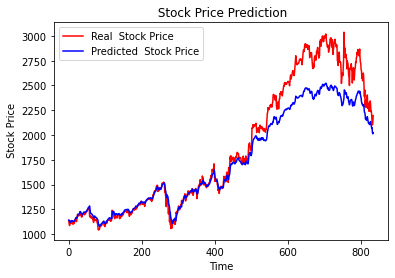

In [ ]:
#plt.xlim([100,500])
plt.plot(original, color = 'red', label = 'Real  Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()